In [4]:
pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for numpy>=1.7.0 from https://files.pythonhosted.org/packages/47/7c/864cb966b96fce5e63fcf25e1e4d957fe5725a635e5f11fe03f39dd9d6b5/numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for mido>=1.1.16 from https://files.pythonhosted.org/packages/fd/28/45deb15c11859d2f10702b32e71de9328a9fa494f989626916db39a9617f/mido-1.3.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.2 MB/s eta 0:00:00
Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=2f351e45223a199c170e3eb5fd3eed9ef61

In [5]:
from pathlib import Path
import pretty_midi
import random
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [ ]:
songs = []
folder = Path('data/')
for file in folder.rglob('*.mid'):
  songs.append(file)

data/Cymatics - Lofi MIDI 2 - C Maj.mid
data/Cymatics - Eternity MIDI 19 - A Min.mid
data/Cymatics - Lofi MIDI 3 - C Min.mid
data/Cymatics - Eternity MIDI 18 - A Maj.mid
data/Piano MIDI (2).mid
data/Rhodes MIDI (7).mid
data/Cymatics - Eternity MIDI 11 - A Maj.mid
data/Cymatics - Eternity MIDI 7 - E Min.mid
data/Rhodes MIDI (6).mid
data/Cymatics - Lofi MIDI 13 - E Min.mid
data/Cymatics - Lofi MIDI 18 - G Maj.mid
data/9.mid
data/Piano MIDI (3).mid
data/8.mid
data/Cymatics - Eternity MIDI 3 - D Maj.mid
data/Piano MIDI.mid
data/16.mid
data/Piano MIDI (4).mid
data/Cymatics - Eternity MIDI 22 - B Min.mid
data/Lofi Piano MIDI.mid
data/Rhodes MIDI.mid
data/Cymatics - Lofi MIDI 9 - D Maj.mid
data/17.mid
data/Piano Chords MIDI (3).mid
data/15.mid
data/Cymatics - Lofi MIDI 11 - E Maj.mid
data/Cymatics - Eternity MIDI 17 - A Maj.mid
data/Piano MIDI (8).mid
data/14.mid
data/Piano 2 MIDI.mid
data/Cymatics - Eternity MIDI 21 - A Min.mid
data/10.mid
data/Cymatics - Eternity MIDI 13 - A Min.mid
data/11

## Data exploration

In [14]:
def print_midi_details(file_path):
    # Convert Path object to string using str()
    midi_data = pretty_midi.PrettyMIDI(str(file_path))
    print(f"\nFile: {file_path.name}")
    print(f"Total duration: {midi_data.get_end_time():.2f} seconds")

    for instrument in midi_data.instruments:
        print(f"\nInstrument: {pretty_midi.program_to_instrument_name(instrument.program)}")
        print(f"Is drum: {instrument.is_drum}")
        print(f"Number of notes: {len(instrument.notes)}")

        # Print first few notes if they exist
        if len(instrument.notes) > 0:
            print("First few notes:")
            for note in instrument.notes[:5]:
                print(f"  Pitch: {note.pitch}, Start: {note.start:.2f}s, End: {note.end:.2f}s")

def play_midi(file_path):
    try:
        midi_data = pretty_midi.PrettyMIDI(str(file_path))
        audio_data = midi_data.synthesize(fs=44100)
        # Play using IPython Audio
        return Audio(audio_data, rate=44100, autoplay=False)


    except Exception as e:
        print(f"Error playing file with pretty_midi: {e}")

In [15]:
exploration_song= songs[7]
print_midi_details(exploration_song)


File: Cymatics - Eternity MIDI 7 - E Min.mid
Total duration: 16.00 seconds

Instrument: Acoustic Grand Piano
Is drum: False
Number of notes: 89
First few notes:
  Pitch: 55, Start: 0.00s, End: 1.00s
  Pitch: 67, Start: 0.00s, End: 1.00s
  Pitch: 66, Start: 0.50s, End: 1.50s
  Pitch: 74, Start: 1.00s, End: 1.50s
  Pitch: 40, Start: 0.00s, End: 2.00s


These are the first 5 notes in midi file:
- Pitch 61 = C#4
- Pitch 73 = C#5
- Pitch 85 = C#6
- Pitch 52 = E3
- Pitch 57 = A3

First 3 notes form a chord since they're played simultaneously. Now let's play the audio.
![Dancing guy](https://c.tenor.com/060MKIQtw4EAAAAC/dancing-happy.gif)

In [16]:
play_midi(exploration_song)

In [17]:
def visualize_midi(file_path):
   try:
       midi_data = pretty_midi.PrettyMIDI(str(file_path))
       audio_data = midi_data.synthesize()
       plt.figure(figsize=(15, 10))

       # 1. Piano Roll View
       plt.subplot(311)
       notes = []
       for instrument in midi_data.instruments:
           for note in instrument.notes:
               notes.append([note.start, note.pitch])
       if notes:
           notes = np.array(notes)
           plt.scatter(notes[:, 0], notes[:, 1], alpha=0.5)
           plt.title('Piano Roll View')
           plt.xlabel('Time (seconds)')
           plt.ylabel('Pitch')

       # 2. Note Density
       plt.subplot(312)
       times = np.linspace(0, midi_data.get_end_time(), 500)
       densities = []
       for t in times:
           density = sum(1 for instrument in midi_data.instruments
                        for note in instrument.notes
                        if note.start <= t <= note.end)
           densities.append(density)
       plt.plot(times, densities)
       plt.title('Note Density Over Time')
       plt.xlabel('Time (seconds)')
       plt.ylabel('Number of Active Notes')

       # 3. Waveform
       plt.subplot(313)
       audio_times = np.linspace(0, midi_data.get_end_time(), len(audio_data))
       plt.plot(audio_times, audio_data, alpha=0.5, color='blue')
       plt.title('Waveform')
       plt.xlabel('Time (seconds)')
       plt.ylabel('Amplitude')

       plt.tight_layout()
       plt.show()

   except Exception as e:
       print(f"Error visualizing file: {e}")

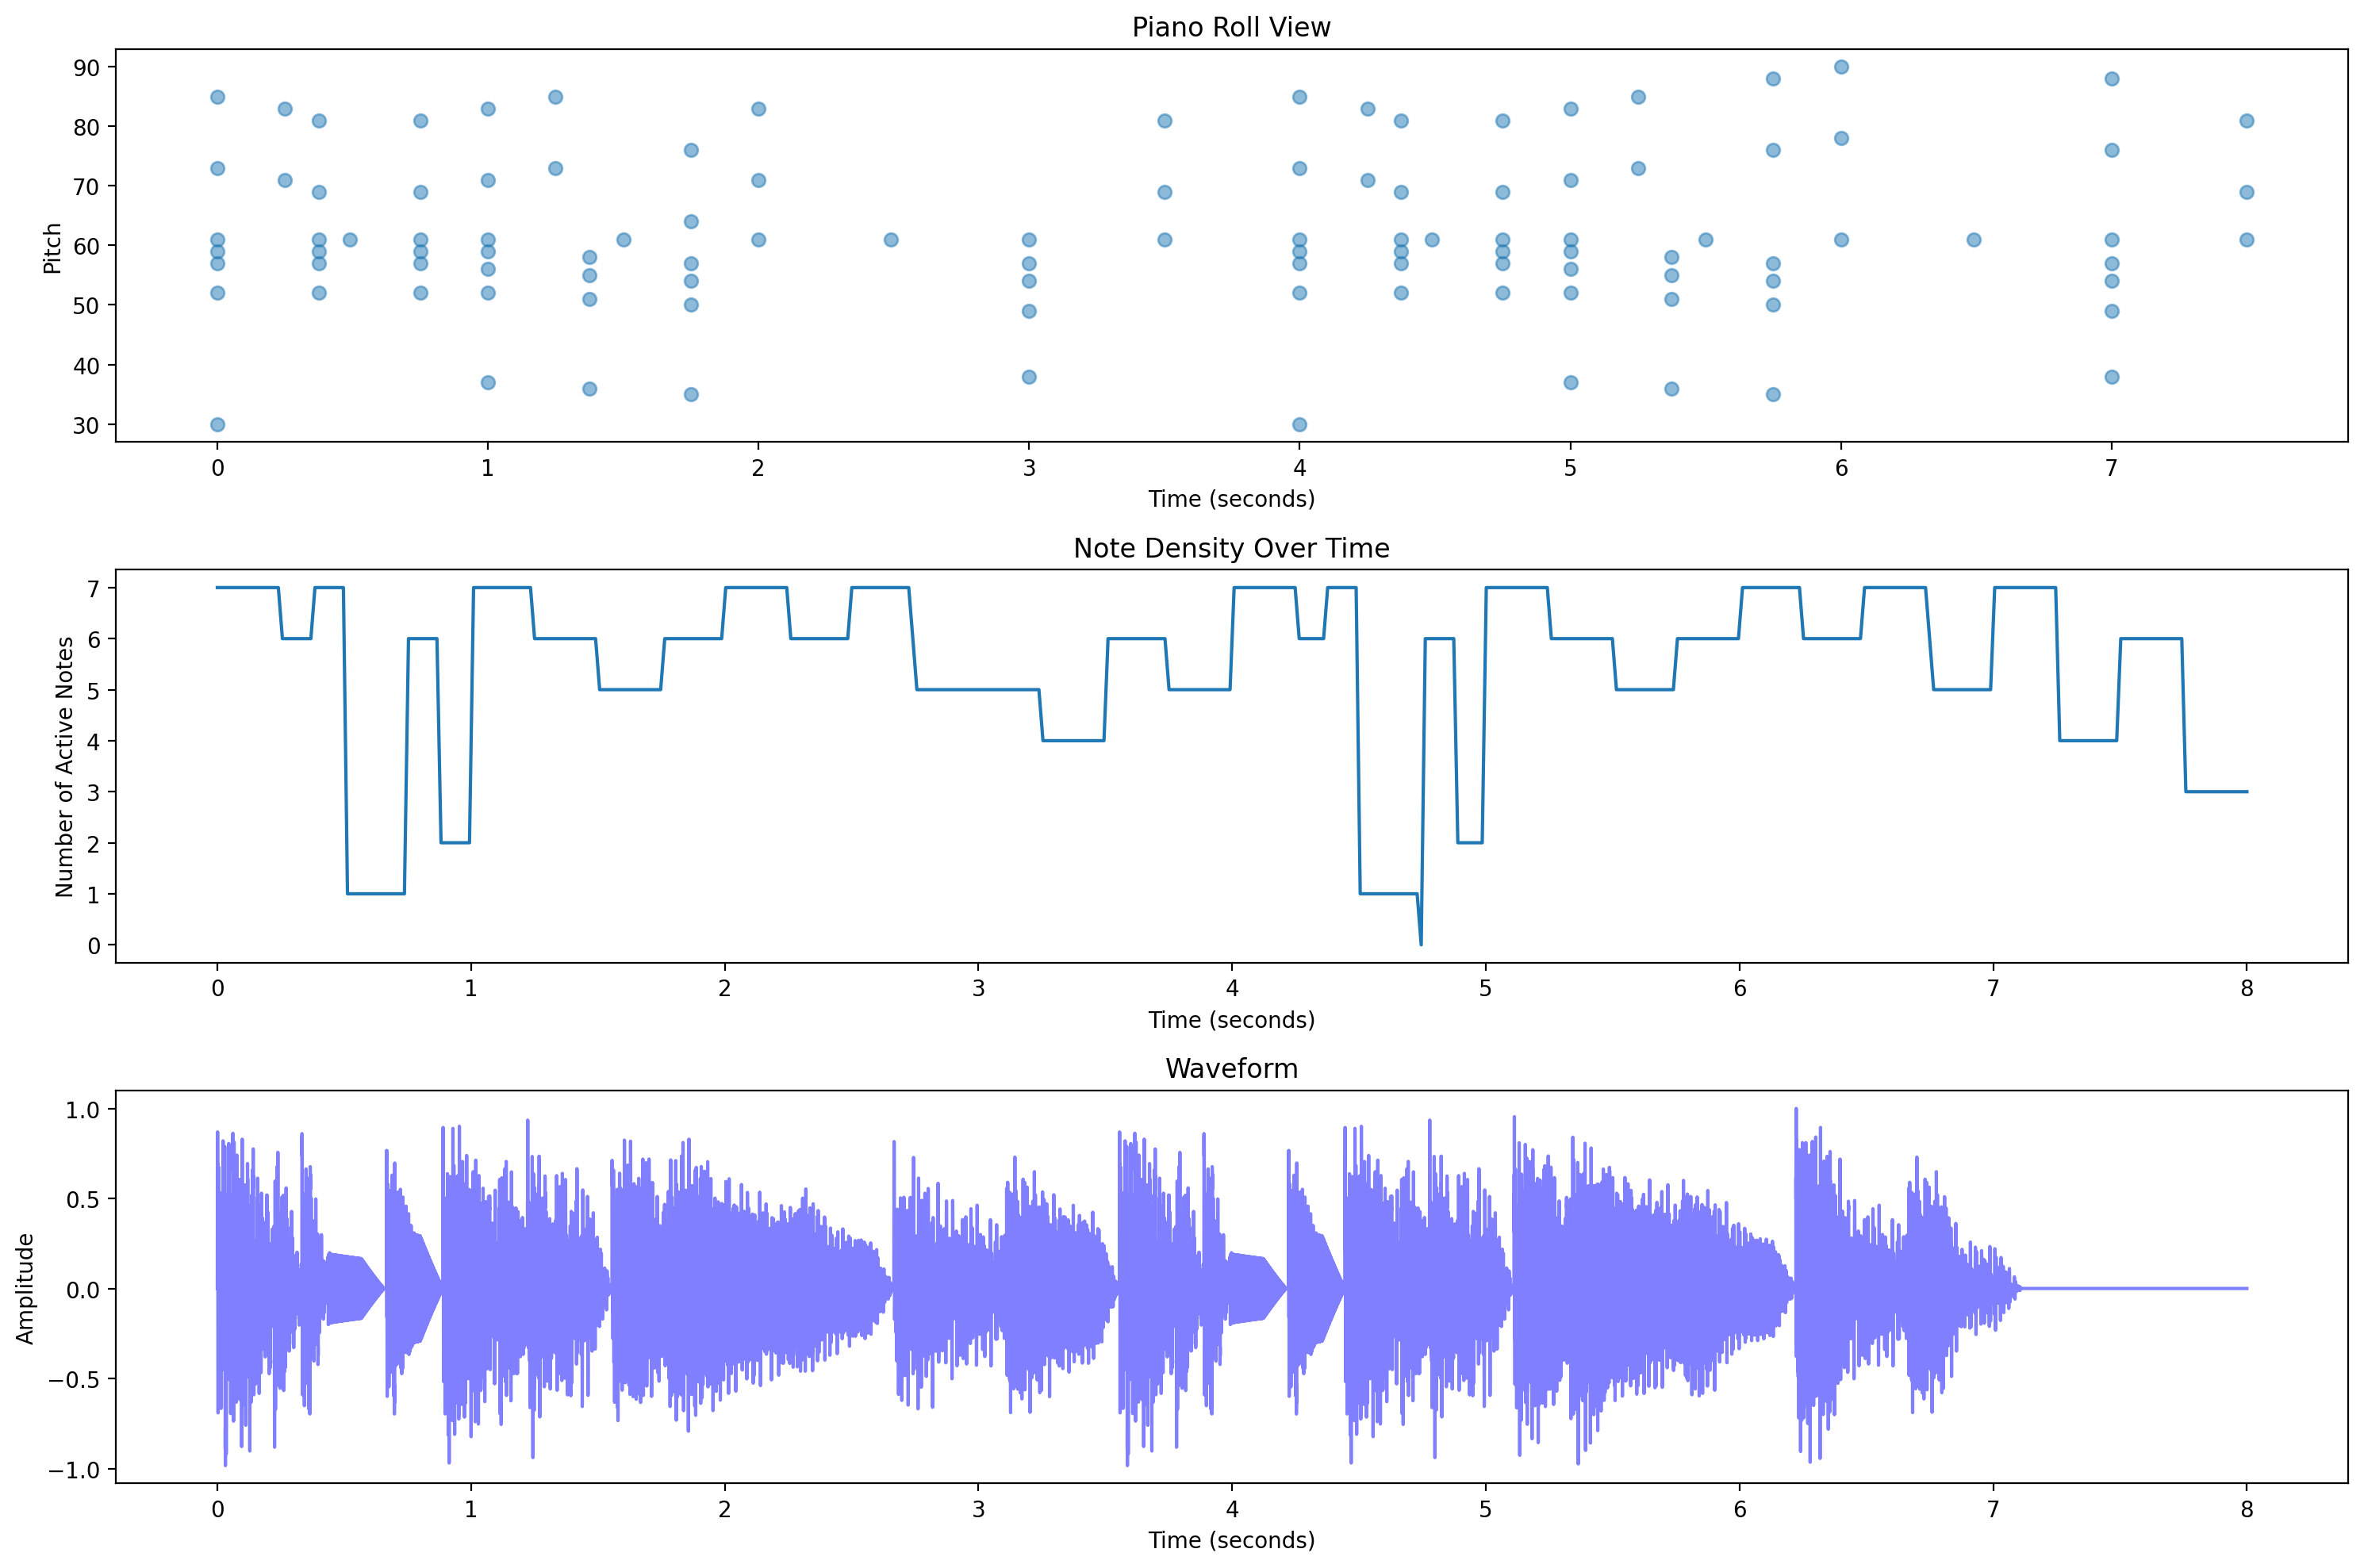

In [ ]:
visualize_midi(exploration_song)
